# Hand On the ENVRI Catalogue API

## Search
The search function of the ENVRI Catalogue API allows users to query the database of metadata contained into the ENVRI Catalogue. The API uses a RESTful architecture, which means that users can send HTTP requests to the API endpoints and receive responses in JSON.

*import requests* is a Python statement that imports the *requests* library, which is a popular Python library for making HTTP requests. The *requests* library provides an interface for sending HTTP requests and handling their responses, making it a popular good choice for RESTfull API access.

In [1]:
import requests

*api_url* is assigned to 'https://ics-c.epos-ip.org/demo/k8s-epos-deploy/envri-fair-catalogue/api/v1'. This represents the base URL for the EPOS ICS-C API.

In [2]:
api_url = 'https://ics-c.epos-ip.org/demo/k8s-epos-deploy/envri-fair-catalogue/api/v1'

the *requests* library to send an HTTP GET request to the ENVRI Catalogue API search endpoint, and then extract the JSON data from the response.
The parameters in the query:
- *facets* is set to false, this parameter is set to true when the client want the API to return the information in a categorized structure, for example the EPOS Data Portal show the information as in different category on multiple levels.
- *q* is the search by free text, it narrows down the results based on which resource contains in the title or in the description or as keyword the specific string

In [4]:
search_endpoint = api_url + '/resources/search?q=&facets=false'

response_search = requests.get(search_endpoint)
data = response_search.json()

This is a JSON object with two key:

1. "*filters*" which has an array of four objects as its value: "*keyword*", "*organisations*", "*sciencedomains*" and "*servicetype*". Each object represents a filter category and has two key-value pairs:
    - "*name*": a string that represents the name of the filter category.
    - "*children*": an array of objects that represent the subcategories for the filter category. Each subcategory object has two key-value pairs:
        - "*id*": a string that represents a unique identifier for the subcategory.
        - "*name*": a string that represents the name of the subcategory.
2. "results*" that holds an array of object representing all the resources available in the system.


In [5]:
data

{'filters': [{'children': [{'id': 'YWN0cmlz', 'name': 'actris'},
    {'id': 'YWVyaWFsIGltYWdpbmc=', 'name': 'aerial imaging'},
    {'id': 'YWVyb3NvbA==', 'name': 'aerosol'},
    {'id': 'YWVyb3NvbHM=', 'name': 'aerosols'},
    {'id': 'YWlyYm9ybmU=', 'name': 'airborne'},
    {'id': 'YWxnYWU=', 'name': 'algae'},
    {'id': 'YXJnbw==', 'name': 'argo'},
    {'id': 'YXRtb3NwaGVyZQ==', 'name': 'atmosphere'},
    {'id': 'YmVudGhvcw==', 'name': 'benthos'},
    {'id': 'YmlvZGl2ZXJzaXR5', 'name': 'biodiversity'},
    {'id': 'YmlvbG9neQ==', 'name': 'biology'},
    {'id': 'Y2xvdWRz', 'name': 'clouds'},
    {'id': 'ZGF0YQ==', 'name': 'data'},
    {'id': 'ZWN2', 'name': 'ecv'},
    {'id': 'ZXBpYmVudGhvcw==', 'name': 'epibenthos'},
    {'id': 'ZmFpcg==', 'name': 'fair'},
    {'id': 'ZmxvYXQ=', 'name': 'float'},
    {'id': 'Z2VvbG9neQ==', 'name': 'geology'},
    {'id': 'Z2xvYmFsIG9jZWFuIG9ic2VydmluZyBsZXZlbA==',
     'name': 'global ocean observing level'},
    {'id': 'Z2xvYmFsLW9jZWFu', 'name': 'globa

Each one of the *results* object has these properties:
- "**availableFormats**": an array of elements each representing a file format that can be downloaded for this resource, including the format type, the url to get the resource with that specific format, a label, and type which define if the format is natively available of it needs a conversion.
- "ddss": a string representing the identifier of the resource.
- "**description**": a string containing a detailed description of the dataset, including the purpose, content, and objectives.
- "**href**": a string representing the URL where the EPOS ICS-C API serve the details of the resources.
- "id": a string representing the unique identifier of this dataset.
- "status": an integer representing the status of the resource.
- "**title**": a string representing the title of the resource.
- "**uid**": a string representing the unique identifier of the resource.

Here it is an instance of the first resource:

In [7]:
data['results'][0]

{'availableFormats': [{'format': 'application/json',
   'href': 'https://ics-c.epos-ip.org/demo/k8s-epos-deploy/envri-fair-catalogue/api/v1/execute?id=7d5bc4cc-d353-4542-8890-3d8abc833033&format=application/json',
   'label': 'APPLICATION/JSON',
   'originalFormat': 'application/json',
   'type': 'ORIGINAL'}],
 'description': 'Map of the flattened phase difference (full evolution) computed between two SAR images acquired over the same scene with the same geometry',
 'href': 'https://ics-c.epos-ip.org/demo/k8s-epos-deploy/envri-fair-catalogue/api/v1/resources/details?id=7d5bc4cc-d353-4542-8890-3d8abc833033',
 'id': '7d5bc4cc-d353-4542-8890-3d8abc833033',
 'status': 1,
 'title': 'Unwrapped Interferograms',
 'uid': 'https://catalog.terradue.com/gep-epos/SatelliteObservations/Dataset/Unwrapped_Interferogram/Distribution/Unwrap_Interf'}

## Details

The details function of the EPOS ICS-C API allows users to retrieve detailed information about a specific seismic event. Users can query the API using the unique ID assigned to each resource in the database.

To retrieve all the detailed information about this resource is enough to do a GET request, using also this time the *requests* library, on the *href* property.

In [8]:
response_detail = requests.get(data['results'][0]['href'])
data_details = response_detail.json()

The details response payload have this structure:
- **availableFormats**: an array that contains multiple object with details about the available format for the data, one for each available format.
- **dataProvider**: an array that contains objects with details about the data provider of the resource, one resource can have multiple dataprovider and each one of these can have multiple dataproviders related, also, if available is present an url to the page of the dataprovider.
- **description**: a string that describes the purpose and objectives of the resource.
- **downloadURL**: This property contains a URL that is a direct link to a downloadable file in a given format. An empty string indicating that there is no download URL available.
- **endpoint**: a string that provides the URL endpoint for accessing the data.
- **frequencyUpdate**: a string that indicates the frequency or the strategy of updates to the data.
- **hasQualityAnnotation**: a string that provides a link to information about the quality assurance of the data.
- **href**: a string that provides a link to the details of the resource.
- **id**: a string that serves as a unique identifier for the resource.
- **internalID**: an array that contains the internal identifier for the resource.
- **keywords**: an array of strings that contain keywords related to the data.
- **license**: a string that provides a link to the license agreement for accessing the data.
- **operationid**: a string that provides a link to the operation of the resource, it contains the unique identifier of the operation.
- **scienceDomain**: an array that provides the science domain of the resource.
- **serviceDescription**: a string that describes the purpose of the web service.
- **serviceDocumentation**: a string that provides a link to the documentation for the web service.
- **serviceEndpoint**: a string that provides the URL endpoint for accessing the web service.
- **serviceName**: a string that provides the name of the web service.
- **serviceParameters**: an array that contains an object with details about the parameters required to use the web service (in this case, the parameter "start" is required and has a default value of "19821001").
- **serviceProvider**: an object with details about the service provider of the resource, one resource can have one service provider and each one of these can have multiple service providers related, also, if available is present an url to the page of the serviceprovider.
- **serviceSpatial**: an object that contains spatial information about the service like a path of coordinates.
- **serviceTemporalCoverage**: an object that provides temporal coverage information for the service.
- **serviceType**: an array that provides the type of the service.
- **spatial**: an object that contains spatial information about the resource like a path defined by a set of coordinates.
- **temporalCoverage**: an object that provides temporal coverage information for the resource.
- **title**: a string that provides the title of the resource.
- **type**: a string that provides the type of the resource.
- **uid**: a string that serves as a unique identifier of the resource.

In [9]:
data_details

{'availableFormats': [{'format': 'application/json',
   'href': 'https://ics-c.epos-ip.org/demo/k8s-epos-deploy/envri-fair-catalogue/api/v1/execute?id=7d5bc4cc-d353-4542-8890-3d8abc833033&format=application/json',
   'label': 'APPLICATION/JSON',
   'originalFormat': 'application/json',
   'type': 'ORIGINAL'}],
 'dataProvider': [{'dataProviderLegalName': 'EPOS',
   'dataProviderUrl': 'https://www.epos-eu.org/'}],
 'description': 'Map of the flattened phase difference (full evolution) computed between two SAR images acquired over the same scene with the same geometry',
 'downloadURL': '',
 'endpoint': 'https://catalog.terradue.com/gep-epos/search?format=json&pt=UNWRAPPED_INTERFEROGRAM{&start, stop, geom, track, uid, od, psn, count, q}&bbox={minLongitude, minLatitude, maxLongitude, maxLatitude}',
 'frequencyUpdate': 'http://purl.org/cld/freq/continuous',
 'href': 'https://ics-c.epos-ip.org/demo/k8s-epos-deploy/envri-fair-catalogue/api/v1/resources/details?id=7d5bc4cc-d353-4542-8890-3d8abc

## Download original data

To download the original data of one of the resource is enough to use the *requests* to execute a GET request using the id of  the resource and on the original URL endpoint

In [11]:
import urllib.parse
response_original_url = requests.get(api_url + '/getoriginalurl?id=' + urllib.parse.quote(data_details['id'].encode('utf8')))
data_original_url = response_original_url.json()

The response is a Json Object with only one property: *url*.
The url is where the resource is located.

In [12]:
data_original_url

{'detail': 'The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.',
 'status': 404,
 'title': 'Not Found',
 'type': 'about:blank'}

Using *requests* is possible to get the information located at that URL

In [10]:
response_original_data = requests.get(data_original_url['url'])
original_data = response_original_data.content
original_data

KeyError: 'url'

## Use case

A user want to do some analysis on some sismic data distributed by the KMNI.

### Search of the data

The user do the search request asking to filter on this string: "Seismic waveforms distributed by the ORFEUS Data Center at KNMI" (The string needs to be url encoded)

In [ ]:
response_search_filtered = requests.get(api_url + "/search?facets=false&q=" + urllib.parse.quote('Seismic waveforms distributed by the ORFEUS Data Center at KNMI'.encode('utf8')))
filtered_data = response_search_filtered.json()
filtered_data

It returned only one result

### Get the data

The user get the data of the resource from the source. Before he get from the ICS-C API the url of the original resource, then he queries the service to get the actual data.

In [ ]:
response_INGV_original_url= requests.get(api_url + '/getoriginalurl?id=' + filtered_data['results'][0]['id'])
original_url_INGV = response_INGV_original_url.json()['url']

response_INGV_data = requests.get(original_url_INGV)
INGV_data = response_INGV_data.content

#### Save the data on file

The user know from the search that the data which he had just retrieved is a *miniseed* file, because in the *availableFormats* it shows that the original file format. So he save it on a file.

In [ ]:
with open("INGV_data.mseed", "wb") as f:
    f.write(INGV_data)

### Visualize the data

Then he decide to visualize the waves using obspy library.

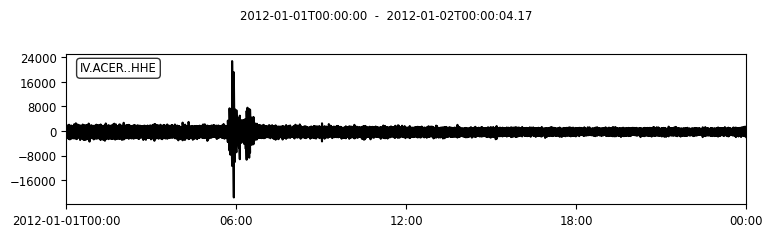

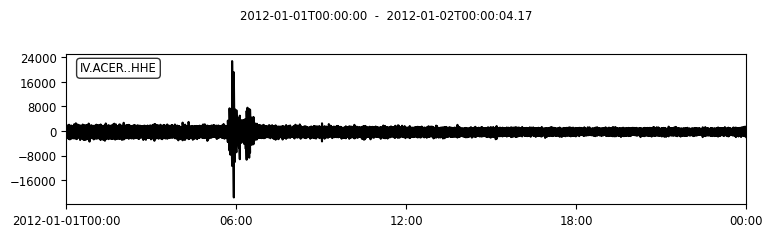

In [1]:
from obspy import read

st = read("INGV_data.mseed", format='mseed')
st.plot()

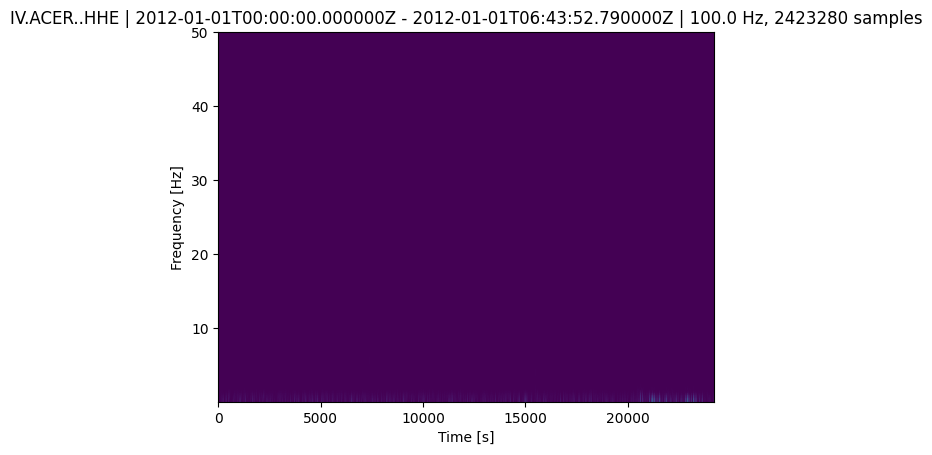

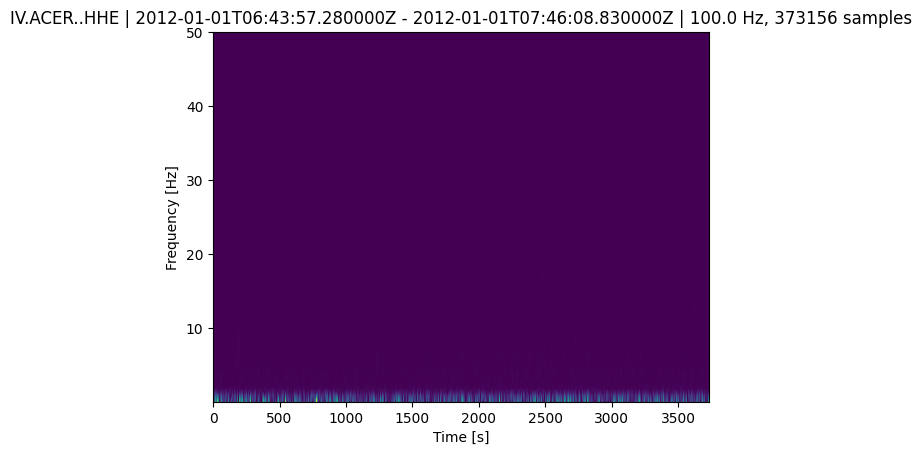

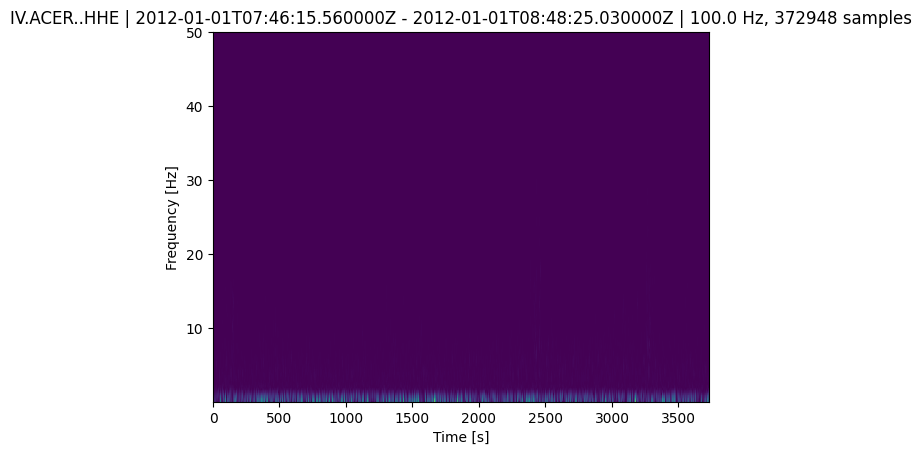

KeyboardInterrupt: 

In [2]:
st.spectrogram()

In [ ]:

tr=st[0]


#stPlot.append(st[0].copy())

#print(stPlot)
# stPlot.plot(size=(800, 600))
tr.spectrogram(log=True, title='BW.RJOB ' + str(st[0].stats.starttime))

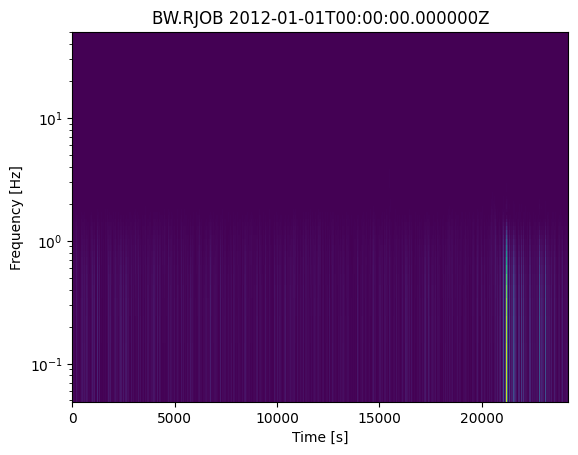

In [3]:

tr = st[0]

#stPlot.append(st[0].copy())

#print(stPlot)
# stPlot.plot(size=(800, 600))
tr.spectrogram(log=True, title='BW.RJOB ' + str(st[0].stats.starttime))

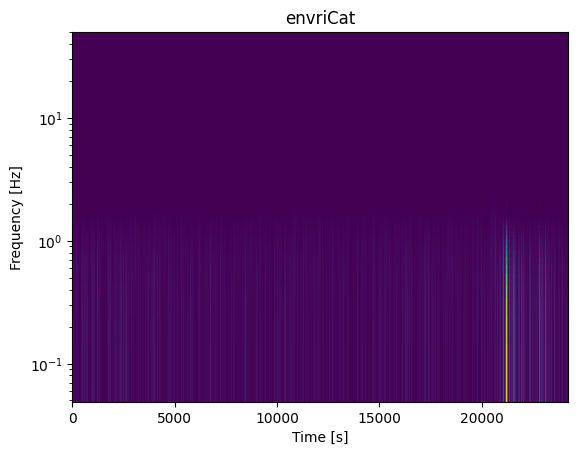

In [4]:
st.detrend('linear')
tr = st[0]
tr.spectrogram(log=True, title='envriCat')
